In [1]:
import pandas as pd
import geopy.distance
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error


In [2]:
!pip install geopy

Defaulting to user installation because normal site-packages is not writeable


In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [7]:
df.drop(columns=["key"],inplace=True)

In [8]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [9]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [10]:
df['pickup_datetime']=df['pickup_datetime'].str[:19]

In [11]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1
49996,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1
49997,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1
49998,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2


In [12]:
df['pickup_date']=pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

In [13]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00
...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1,2013-06-12 23:25:15
49996,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1,2015-06-22 17:19:18
49997,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1,2011-01-30 04:53:00
49998,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2,2012-11-06 07:09:00


In [14]:
df['pickup_year']=df['pickup_date'].dt.year

In [15]:
df['pickup_month']=df['pickup_date'].dt.month

In [16]:
df['pickup_day']=df['pickup_date'].dt.day

In [17]:
df['pickup_hour']=df['pickup_date'].dt.hour

In [18]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_year,pickup_month,pickup_day,pickup_hour
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,2009,6,15,17
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2010,1,5,16
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,2011,8,18,0
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,2012,4,21,4
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2010,3,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1,2013-06-12 23:25:15,2013,6,12,23
49996,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1,2015-06-22 17:19:18,2015,6,22,17
49997,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1,2011-01-30 04:53:00,2011,1,30,4
49998,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2,2012-11-06 07:09:00,2012,11,6,7


In [19]:
df['pickup_hour'].value_counts()

19    3118
18    3077
20    2859
21    2817
22    2808
17    2490
13    2475
12    2471
14    2471
23    2467
9     2379
11    2357
15    2355
10    2259
8     2209
16    2045
7     1899
0     1890
1     1484
2     1088
6     1017
3      847
4      610
5      508
Name: pickup_hour, dtype: int64

In [20]:
df.loc[0]

fare_amount                          4.5
pickup_datetime      2009-06-15 17:26:21
pickup_longitude              -73.844311
pickup_latitude                40.721319
dropoff_longitude              -73.84161
dropoff_latitude               40.712278
passenger_count                        1
pickup_date          2009-06-15 17:26:21
pickup_year                         2009
pickup_month                           6
pickup_day                            15
pickup_hour                           17
Name: 0, dtype: object

In [21]:
df.columns

Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_date', 'pickup_year', 'pickup_month', 'pickup_day',
       'pickup_hour'],
      dtype='object')

In [22]:
df=df[df['pickup_latitude']<400]

In [23]:
df.reset_index(inplace=True)

In [24]:
df.shape

(49999, 13)

In [25]:
def calculate_distance(lat1,long1,lat2,long2):
    coord_1=(lat1,long1)
    coord_2=(lat2,long2)
    return geopy.distance.geodesic(coord_1,coord_2).km

In [26]:
dist=[]
for i in range (df.shape[0]):
    dist.append(calculate_distance(df['pickup_latitude'][i],df['pickup_longitude'][i],df['dropoff_latitude'][i],df['dropoff_longitude'][i]))

In [27]:
len(dist)

49999

In [28]:
df['Distance']=dist

C:\Users\jbaby\AppData\Local\Temp\ipykernel_12720\1817398433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance']=dist


In [29]:
df

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_year,pickup_month,pickup_day,pickup_hour,Distance
0,0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,2009,6,15,17,1.029601
1,1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2010,1,5,16,8.443441
2,2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,2011,8,18,0,1.389132
3,3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,2012,4,21,4,2.795790
4,4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2010,3,9,7,1.998338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1,2013-06-12 23:25:15,2013,6,12,23,4.935469
49995,49996,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1,2015-06-22 17:19:18,2015,6,22,17,0.873775
49996,49997,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1,2011-01-30 04:53:00,2011,1,30,4,2.260573
49997,49998,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2,2012-11-06 07:09:00,2012,11,6,7,0.666621


In [30]:
df['Distance']=round(df['Distance'],1)

C:\Users\jbaby\AppData\Local\Temp\ipykernel_12720\2720264797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Distance']=round(df['Distance'],1)


In [31]:
df

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_year,pickup_month,pickup_day,pickup_hour,Distance
0,0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,2009,6,15,17,1.0
1,1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2010,1,5,16,8.4
2,2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,2011,8,18,0,1.4
3,3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,2012,4,21,4,2.8
4,4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2010,3,9,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1,2013-06-12 23:25:15,2013,6,12,23,4.9
49995,49996,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1,2015-06-22 17:19:18,2015,6,22,17,0.9
49996,49997,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1,2011-01-30 04:53:00,2011,1,30,4,2.3
49997,49998,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2,2012-11-06 07:09:00,2012,11,6,7,0.7


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              49999 non-null  int64         
 1   fare_amount        49999 non-null  float64       
 2   pickup_datetime    49999 non-null  object        
 3   pickup_longitude   49999 non-null  float64       
 4   pickup_latitude    49999 non-null  float64       
 5   dropoff_longitude  49999 non-null  float64       
 6   dropoff_latitude   49999 non-null  float64       
 7   passenger_count    49999 non-null  int64         
 8   pickup_date        49999 non-null  datetime64[ns]
 9   pickup_year        49999 non-null  int64         
 10  pickup_month       49999 non-null  int64         
 11  pickup_day         49999 non-null  int64         
 12  pickup_hour        49999 non-null  int64         
 13  Distance           49999 non-null  float64       
dtypes: dat

In [33]:
df

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_year,pickup_month,pickup_day,pickup_hour,Distance
0,0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 17:26:21,2009,6,15,17,1.0
1,1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 16:52:16,2010,1,5,16,8.4
2,2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18 00:35:00,2011,8,18,0,1.4
3,3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 04:30:42,2012,4,21,4,2.8
4,4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 07:51:00,2010,3,9,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,15.0,2013-06-12 23:25:15,-73.999973,40.748531,-74.016899,40.705993,1,2013-06-12 23:25:15,2013,6,12,23,4.9
49995,49996,7.5,2015-06-22 17:19:18,-73.984756,40.768211,-73.987366,40.760597,1,2015-06-22 17:19:18,2015,6,22,17,0.9
49996,49997,6.9,2011-01-30 04:53:00,-74.002698,40.739428,-73.998108,40.759483,1,2011-01-30 04:53:00,2011,1,30,4,2.3
49997,49998,4.5,2012-11-06 07:09:00,-73.946062,40.777567,-73.953450,40.779687,2,2012-11-06 07:09:00,2012,11,6,7,0.7


In [34]:
df['pickup_datetime'].min(),df['pickup_datetime'].max()

('2009-01-01 01:31:49', '2015-06-30 22:42:39')

In [35]:
from geopy.geocoders import Nominatim
import time
from pprint import pprint
# instantiate a new Nominatim client
app = Nominatim(user_agent="tutorial")
# get location raw data
location = app.geocode("Nairobi, Kenya").raw
# print raw data
pprint(location)

{'addresstype': 'city',
 'boundingbox': ['-1.2927502', '-1.2799499', '36.8150852', '36.8274926'],
 'class': 'landuse',
 'display_name': 'Central Business District, 46464, Kenya',
 'importance': 0.6250267594337631,
 'lat': '-1.2832533',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'http://osm.org/copyright',
 'lon': '36.8172449',
 'name': 'Central Business District',
 'osm_id': 239077078,
 'osm_type': 'way',
 'place_id': 31782302,
 'place_rank': 21,
 'type': 'commercial'}


In [36]:
def get_address_by_location(latitude, longitude, language="en"):
    """This function returns an address as raw from a location
    will repeat until success"""
    # build coordinates string to pass to reverse() function
    coordinates = f"{latitude}, {longitude}"
    # sleep for a second to respect Usage Policy
    time.sleep(1)
    try:
        return app.reverse(coordinates, language=language).raw
    except:
        return get_address_by_location(latitude, longitude)

In [37]:
# define your coordinates
latitude = 36.723
longitude = 3.188
# get the address info
address = get_address_by_location(latitude, longitude)
# print all returned data
pprint(address)

{'address': {'ISO3166-2-lvl4': 'DZ-16',
             'city': 'Bab Ezzouar',
             'country': 'Algeria',
             'country_code': 'dz',
             'county': 'Dar el-Beida District',
             'neighbourhood': 'Cité Douzi 04',
             'postcode': '16024',
             'state': 'Algiers',
             'suburb': '324 apartments district'},
 'addresstype': 'road',
 'boundingbox': ['36.7231765', '36.7242661', '3.1866439', '3.1903998'],
 'class': 'highway',
 'display_name': 'Cité Douzi 04, 324 apartments district, Bab Ezzouar, Dar '
                 'el-Beida District, Algiers, 16024, Algeria',
 'importance': 0.10000999999999993,
 'lat': '36.72380363740118',
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. '
            'http://osm.org/copyright',
 'lon': '3.188236679492425',
 'name': '',
 'osm_id': 42812185,
 'osm_type': 'way',
 'place_id': 44890680,
 'place_rank': 26,
 'type': 'residential'}


In [38]:
address['address']

{'neighbourhood': 'Cité Douzi 04',
 'suburb': '324 apartments district',
 'city': 'Bab Ezzouar',
 'county': 'Dar el-Beida District',
 'state': 'Algiers',
 'ISO3166-2-lvl4': 'DZ-16',
 'postcode': '16024',
 'country': 'Algeria',
 'country_code': 'dz'}

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   index              49999 non-null  int64         
 1   fare_amount        49999 non-null  float64       
 2   pickup_datetime    49999 non-null  object        
 3   pickup_longitude   49999 non-null  float64       
 4   pickup_latitude    49999 non-null  float64       
 5   dropoff_longitude  49999 non-null  float64       
 6   dropoff_latitude   49999 non-null  float64       
 7   passenger_count    49999 non-null  int64         
 8   pickup_date        49999 non-null  datetime64[ns]
 9   pickup_year        49999 non-null  int64         
 10  pickup_month       49999 non-null  int64         
 11  pickup_day         49999 non-null  int64         
 12  pickup_hour        49999 non-null  int64         
 13  Distance           49999 non-null  float64       
dtypes: dat

In [40]:
neighbourhood=[]
suburb=[]
city=[]
country=[]
postcode=[]
for i in range (20):
    try:
        address = get_address_by_location(df['pickup_latitude'][i],df['pickup_longitude'][i])
        neighbourhood.append( address['address']['neighbourhood'])
        suburb.append( address['address']['suburb'])
        city.append( address['address']['city'])
        country.append( address['address']['country'])
        postcode.append( address['address']['postcode'])
    except:
        print(i)

11
15
16
18


In [41]:
df['pickup_latitude']=round(df['pickup_latitude'],2)
df['pickup_longitude']=round(df['pickup_longitude'],2)
df['dropoff_latitude']=round(df['dropoff_latitude'],2)
df['dropoff_longitude']=round(df['dropoff_longitude'],2)

C:\Users\jbaby\AppData\Local\Temp\ipykernel_12720\1835784505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_latitude']=round(df['pickup_latitude'],2)
C:\Users\jbaby\AppData\Local\Temp\ipykernel_12720\1835784505.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_longitude']=round(df['pickup_longitude'],2)
C:\Users\jbaby\AppData\Local\Temp\ipykernel_12720\1835784505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

In [42]:
df

,index,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_year,pickup_month,pickup_day,pickup_hour,Distance
0,0,4.5,2009-06-15 17:26:21,-73.84,40.72,-73.84,40.71,1,2009-06-15 17:26:21,2009,6,15,17,1.0
1,1,16.9,2010-01-05 16:52:16,-74.02,40.71,-73.98,40.78,1,2010-01-05 16:52:16,2010,1,5,16,8.4
2,2,5.7,2011-08-18 00:35:00,-73.98,40.76,-73.99,40.75,2,2011-08-18 00:35:00,2011,8,18,0,1.4
3,3,7.7,2012-04-21 04:30:42,-73.99,40.73,-73.99,40.76,1,2012-04-21 04:30:42,2012,4,21,4,2.8
4,4,5.3,2010-03-09 07:51:00,-73.97,40.77,-73.96,40.78,1,2010-03-09 07:51:00,2010,3,9,7,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,49995,15.0,2013-06-12 23:25:15,-74.00,40.75,-74.02,40.71,1,2013-06-12 23:25:15,2013,6,12,23,4.9
49995,49996,7.5,2015-06-22 17:19:18,-73.98,40.77,-73.99,40.76,1,2015-06-22 17:19:18,2015,6,22,17,0.9
49996,49997,6.9,2011-01-30 04:53:00,-74.00,40.74,-74.00,40.76,1,2011-01-30 04:53:00,2011,1,30,4,2.3
49997,49998,4.5,2012-11-06 07:09:00,-73.95,40.78,-73.95,40.78,2,2012-11-06 07:09:00,2012,11,6,7,0.7


In [43]:
df.columns

Index(['index', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_date', 'pickup_year', 'pickup_month',
       'pickup_day', 'pickup_hour', 'Distance'],
      dtype='object')

In [44]:
df.drop(columns=['index','pickup_datetime','pickup_date'],inplace=True)

C:\Users\jbaby\AppData\Local\Temp\ipykernel_12720\926903870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['index','pickup_datetime','pickup_date'],inplace=True)


In [45]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        49999 non-null  float64
 1   pickup_longitude   49999 non-null  float64
 2   pickup_latitude    49999 non-null  float64
 3   dropoff_longitude  49999 non-null  float64
 4   dropoff_latitude   49999 non-null  float64
 5   passenger_count    49999 non-null  int64  
 6   pickup_year        49999 non-null  int64  
 7   pickup_month       49999 non-null  int64  
 8   pickup_day         49999 non-null  int64  
 9   pickup_hour        49999 non-null  int64  
 10  Distance           49999 non-null  float64
dtypes: float64(6), int64(5)
memory usage: 4.2 MB


Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'Distance'],
      dtype='object')

In [46]:
X=df[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count','pickup_year', 'pickup_month', 'pickup_day', 'pickup_hour', 'Distance']]
y=df['fare_amount']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [48]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((37499, 10), (12500, 10), (37499,), (12500,))

In [49]:
linReg=LinearRegression()

In [50]:
linReg.fit(X_train,y_train)

LinearRegression()

In [51]:
linReg.coef_

array([ 5.41445641e-02,  7.76872733e-02, -7.09339411e-02, -1.13616025e-01,
        1.26116239e-01,  6.87700039e-01,  1.09272898e-01,  1.56364981e-04,
       -3.58169997e-02,  4.02836661e-04])

In [52]:
linReg.intercept_

-1372.305550986021

In [53]:
df.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,Distance
fare_amount,1.000000,0.005946,-0.006603,0.004285,-0.005442,0.016574,0.120826,0.026880,-0.001433,-0.022025,0.015676
pickup_longitude,0.005946,1.000000,-0.984131,0.956132,-0.946968,-0.005606,-0.001285,0.000417,0.006005,0.004916,0.142786
pickup_latitude,-0.006603,-0.984131,1.000000,-0.943267,0.960936,0.003975,-0.000903,0.000483,-0.008881,-0.004311,-0.130104
dropoff_longitude,0.004285,0.956132,-0.943267,1.000000,-0.982117,-0.004936,-0.000251,0.001408,0.005140,0.005488,0.145655
dropoff_latitude,-0.005442,-0.946968,0.960936,-0.982117,1.000000,0.002963,-0.001887,-0.000424,-0.007934,-0.004505,-0.127237
passenger_count,0.016574,-0.005606,0.003975,-0.004936,0.002963,1.000000,0.006340,0.009177,0.006859,0.011346,-0.005589
pickup_year,0.120826,-0.001285,-0.000903,-0.000251,-0.001887,0.006340,1.000000,-0.115740,-0.011131,0.004101,0.022323
pickup_month,0.026880,0.000417,0.000483,0.001408,-0.000424,0.009177,-0.115740,1.000000,-0.017248,-0.001949,-0.008915
pickup_day,-0.001433,0.006005,-0.008881,0.005140,-0.007934,0.006859,-0.011131,-0.017248,1.000000,-0.008249,0.010279
pickup_hour,-0.022025,0.004916,-0.004311,0.005488,-0.004505,0.011346,0.004101,-0.001949,-0.008249,1.000000,0.000604


<Axes: >

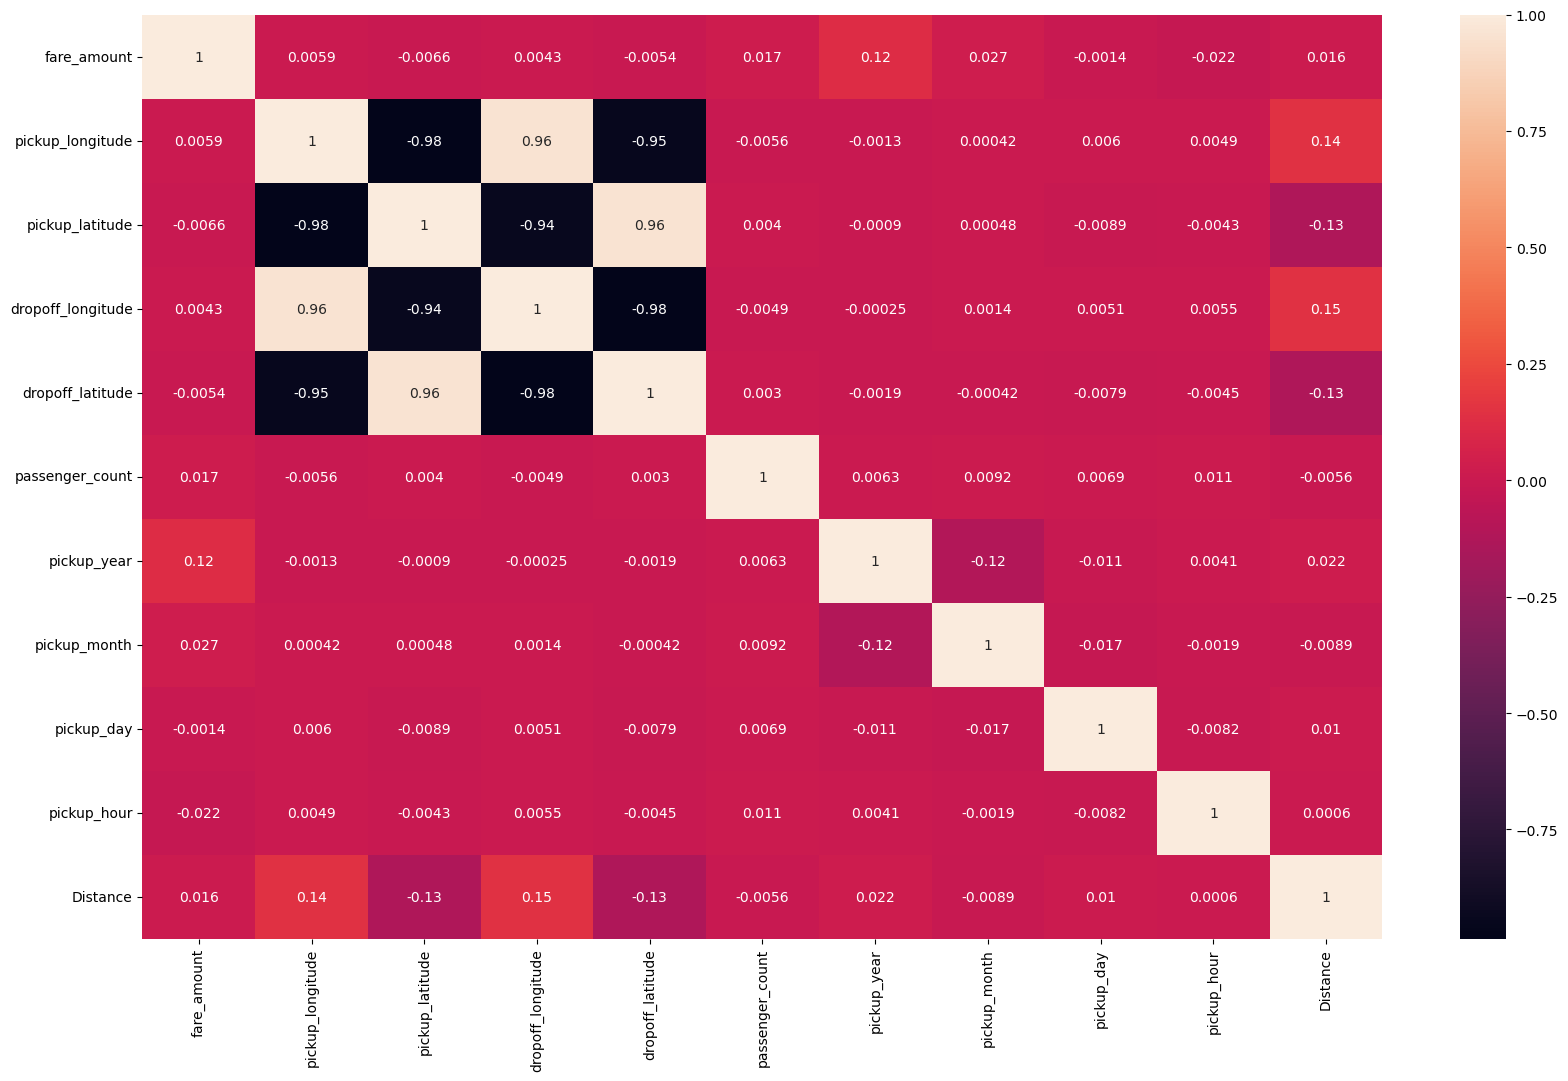

In [54]:
plt.figure(figsize=(20,12))
sb.heatmap(df.corr(),annot=True)

In [55]:
y_pred=linReg.predict(X_test)

In [56]:
y_pred

array([13.49495868, 10.36458126,  9.63788423, ..., 10.32821943,
       13.28389239, 12.13479459])

In [57]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,Distance
26920,-73.98,40.77,-73.98,40.77,2,2014,12,30,16,0.6
31955,-73.96,40.80,-73.98,40.78,5,2009,12,18,18,3.1
39702,-74.00,40.73,-73.99,40.74,1,2009,9,26,15,1.2
47029,-73.96,40.77,-73.97,40.77,1,2014,7,3,16,1.2
9413,-73.99,40.74,-73.97,40.76,2,2014,10,13,21,3.2
...,...,...,...,...,...,...,...,...,...,...
10235,-74.00,40.74,-74.00,40.72,1,2013,5,12,13,2.2
3428,-74.00,40.73,-73.99,40.72,1,2012,9,9,23,1.3
11649,-73.96,40.77,-73.79,40.64,1,2011,3,2,16,20.3
23324,-73.97,40.76,-73.95,40.77,1,2014,6,26,0,2.1


In [58]:
y_test

26920     3.5
31955     8.5
39702     5.7
47029     6.5
9413     10.5
         ... 
10235     8.0
3428      5.5
11649    49.8
23324     7.5
13825     8.5
Name: fare_amount, Length: 12500, dtype: float64

In [59]:
y_pred=y_pred.round(2)

In [60]:
mean_absolute_error(y_pred,y_test)

5.9833976

In [61]:
df['fare_amount']

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49994    15.0
49995     7.5
49996     6.9
49997     4.5
49998    10.9
Name: fare_amount, Length: 49999, dtype: float64

In [62]:
df.tail()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,Distance
49994,15.0,-74.00,40.75,-74.02,40.71,1,2013,6,12,23,4.9
49995,7.5,-73.98,40.77,-73.99,40.76,1,2015,6,22,17,0.9
49996,6.9,-74.00,40.74,-74.00,40.76,1,2011,1,30,4,2.3
49997,4.5,-73.95,40.78,-73.95,40.78,2,2012,11,6,7,0.7
49998,10.9,-73.93,40.76,-73.93,40.76,1,2010,1,13,8,0.0


In [63]:
df1 = pd.DataFrame(y_pred)
df1

,0
0,13.49
1,10.36
2,9.64
3,12.82
4,13.09
...,...
12495,12.03
12496,11.41
12497,10.33
12498,13.28


In [64]:
#X_test->26735
#fare_amount=11.74
#mean_absolute_error=5.9241352

In [65]:
df.iloc[26735,[0]]

fare_amount    8.5
Name: 26735, dtype: float64

In [66]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_day,pickup_hour,Distance
count,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000
mean,11.364333,-72.509670,39.926431,-72.504541,39.926136,1.667853,2011.739275,6.273285,15.671753,13.489130,18.510192
std,9.685587,10.393954,6.011717,10.407663,6.014782,1.289204,1.862655,3.461190,8.660638,6.506991,355.592739
min,-5.000000,-75.420000,-74.010000,-84.650000,-74.010000,0.000000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,6.000000,-73.990000,40.730000,-73.990000,40.730000,1.000000,2010.000000,3.000000,8.000000,9.000000,1.200000
50%,8.500000,-73.980000,40.750000,-73.980000,40.750000,1.000000,2012.000000,6.000000,16.000000,14.000000,2.100000
75%,12.500000,-73.970000,40.770000,-73.960000,40.770000,2.000000,2013.000000,9.000000,23.000000,19.000000,3.900000
max,200.000000,40.780000,43.100000,40.850000,43.420000,6.000000,2015.000000,12.000000,31.000000,23.000000,8668.200000
